# New York City Taxi Fare Prediction | Random forest | XGB

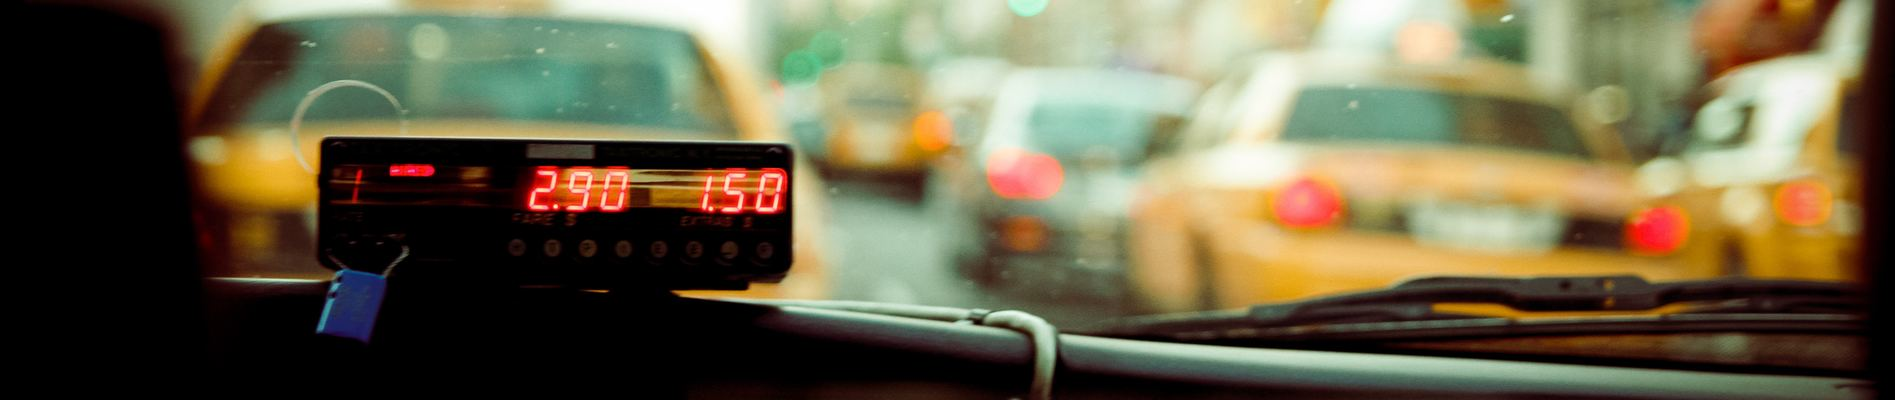

# Objective
This dataset is a record of taxi trips in New York City, split into training and test datasets.

Training and test observations both have the same features: passenger count, pickup longitude, pickup latitude, dropoff longitude, dropoff latitude and pickup datetime.

Training observations are labeled with the fare amount paid.

Our objective is to create a model that will accurately estimate the fare amount of trips in the test dataset. Accuracy is measured by root mean square error.

We will also be performing exploratory data analysis in an attempt to better understand the dataset.

# **`Data fields`**

### `ID`
* `key` - Unique string identifying each row in both the training and test sets. Comprised of `pickup_datetime` plus a unique integer, but this doesn't matter, it should just be used as a unique ID field.
Required in your submission CSV. Not necessarily needed in the training set, but could be useful to simulate a 'submission file' while doing cross-validation within the training set.

# **`Features`**
* `pickup_datetime` - timestamp value indicating when the taxi ride started.
* `pickup_longitude` - float for longitude coordinate of where the taxi ride started.
* `pickup_latitude` - float for latitude coordinate of where the taxi ride started.
* `dropoff_longitude` - float for longitude coordinate of where the taxi ride ended.
* `dropoff_latitude` - float for latitude coordinate of where the taxi ride ended.
* `passenger_count` - integer indicating the number of passengers in the taxi ride.

# **`Target`**
* `fare_amount` - float dollar amount of the cost of the taxi ride. This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.

# **Installing Libraries**

In [3]:
!pip install numpy pandas jovian opendatasets scikit-learn xgboost --quiet

In [4]:
import jovian

In [5]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [6]:
import opendatasets as od

In [7]:
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [8]:
%%time
od.download(dataset_url)

Skipping, found downloaded files in "./new-york-city-taxi-fare-prediction" (use force=True to force download)
CPU times: user 1.2 ms, sys: 35 µs, total: 1.24 ms
Wall time: 1.25 ms


In [9]:
data_dir = './new-york-city-taxi-fare-prediction'

### **`View Dataset Files`** 

In [10]:
# List of files with size
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 root root  486 Nov 19 06:26 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 root root 336K Nov 19 06:26 sample_submission.csv
-rw-r--r-- 1 root root 960K Nov 19 06:26 test.csv
-rw-r--r-- 1 root root 5.4G Nov 19 06:27 train.csv


In [11]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [12]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [13]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


In [14]:
# No. of lines in training set
!wc -l {data_dir}/train.csv

55423856 ./new-york-city-taxi-fare-prediction/train.csv


In [15]:
# No. of lines in test set
!wc -l {data_dir}/test.csv

9914 ./new-york-city-taxi-fare-prediction/test.csv


In [16]:
# No. of lines in submission file
!wc -l {data_dir}/sample_submission.csv

9915 ./new-york-city-taxi-fare-prediction/sample_submission.csv


`Observations:`

- This is a supervised learning regression problem
- Training data is 5.5 GB in size
- Training data has 5.5 million rows
- Test set is much smaller (< 10,000 rows)
- The training set has 8 columns:
    - `key` (a unique identifier)
    - `fare_amount` (target column)
    - `pickup_datetime`
    - `pickup_longitude`
    - `pickup_latitude`
    - `dropoff_longitude`
    - `dropoff_latitude`
    - `passenger_count`
- The test set has all columns except the target column `fare_amount`.
- The submission file should contain the `key` and `fare_amount` for each test sample.


In [17]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


### Loading Training Set

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Ignore the `key` column
- Parse pickup datetime while loading data 
- Specify data types for other columns
   - `float32` for geo coordinates
   - `float32` for fare amount
   - `uint8` for passenger count
- Work with a 1% sample of the data (~500k rows)

We can apply these optimizations while using [`pd.read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [18]:
import pandas as pd
import random

In [19]:
# Change this
sample_frac = 0.01

In [20]:
%%time
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'passenger_count': 'float32'
}

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/train.csv", 
                 usecols=selected_cols, 
                 dtype=dtypes, 
                 parse_dates=['pickup_datetime'], 
                 skiprows=skip_row)

CPU times: user 2min 11s, sys: 3.61 s, total: 2min 14s
Wall time: 2min 21s


In [21]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755481,1.0
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2.0
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766963,3.0
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1.0
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1.0
...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602893,1.0
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2.0
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740142,1.0
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756217,1.0


In [22]:
test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])

In [23]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1.0
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1.0
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746139,1.0
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751635,1.0
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6.0


In [24]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## 2. Explore the Dataset

- Basic info about training set
- Basic info about test set
- Exploratory data analysis & visualization
- Ask & answer questions

### `Training Set`

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float64            
 6   passenger_count    552450 non-null  float32            
dtypes: datetime64[ns, UTC](1), float32(5), float64(1)
memory usage: 19.0 MB


In [26]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934257,1.684983
std,9.811924,11.618246,8.061114,12.074346,9.255058,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733988,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753102,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768060,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403027,208.000000


In [27]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

Observations about training data:

- 550k+ rows, as expected
- No missing data (in the sample)
- `fare_amount` ranges from \$-52.0 to \$499.0 
- `passenger_count` ranges from 0 to 208 
- There seem to be some errors in the latitude & longitude values
- Dates range from 1st Jan 2009 to 30th June 2015
- The dataset takes up ~19 MB of space in the RAM

We may need to deal with outliers and data entry errors before we train our model.

### `Test Set`

In [28]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   float32            
dtypes: datetime64[ns, UTC](1), float32(4), float64(1), object(1)
memory usage: 387.4+ KB


In [29]:
test_df.describe()


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252190,40.573143,-74.263245,40.568973,1.000000
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696683,6.000000


In [30]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

Some observations about the test set:

- 9914 rows of data
- No missing values
- No obvious data entry errors
- 1 to 6 passengers (we can limit training data to this range)
- Latitudes lie between 40 and 42
- Longitudes lie between -75 and -72
- Pickup dates range from Jan 1st 2009 to Jun  30th 2015 (same as training set)

We can use the ranges of the test set to drop outliers/invalid data from the training set.

### `Exploratory Data Analysis and Visualization`



1. What is the busiest day of the week?
2. What is the busiest time of the day?
3. In which month are fares the highest?
4. Which pickup locations have the highest fares?
5. Which drop locations have the highest fares?
6. What is the average ride distance?



In [31]:
# visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## 3. Prepare Dataset for Training

- Split Training & Validation Set
- Fill/Remove Missing Values
- Extract Inputs & Outputs
   - Training
   - Validation
   - *Test*

### Split Training & Validation Set

We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data. 

Since the test set and training set have the same date ranges, we can pick a random 20% fraction.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42 )

In [34]:
len(train_df), len(val_df)

(441960, 110490)

### Fill/Remove Missing Values

There are no missing values in our sample, but if there were, we could simply drop the rows with missing values instead of trying to fill them (since we have a lot of training data)>

In [35]:
train_df = train_df.dropna()
val_df = val_df.dropna()

### Extract Inputs and Outputs

In [36]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [37]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [38]:
target_col = 'fare_amount'

#### Training

In [39]:
train_inputs = train_df[input_cols]

In [40]:
train_targets = train_df[[target_col]]

In [41]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4.0
360070,-73.993805,40.724579,-73.993805,40.724577,1.0
372609,-73.959160,40.780750,-73.969116,40.761231,1.0
550895,-73.952187,40.783951,-73.978645,40.772603,1.0
444151,-73.977112,40.746834,-73.991104,40.750403,2.0
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763167,1.0
259178,-73.972656,40.764042,-74.013176,40.707841,2.0
365838,-73.991982,40.749767,-73.989845,40.720552,3.0
131932,-73.969055,40.761398,-73.990814,40.751327,1.0


In [42]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


#### Validation

In [43]:
val_inputs = val_df[input_cols]

In [44]:
val_targets = val_df[target_col]

In [45]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1.0
149839,-73.977386,40.738335,-73.976143,40.751204,1.0
515867,-73.983910,40.749470,-73.787170,40.646643,1.0
90307,-73.790794,40.643463,-73.972252,40.690180,1.0
287032,-73.976593,40.761944,-73.991463,40.750309,2.0
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750020,3.0
19482,-73.986725,40.755920,-73.985855,40.731170,1.0
186063,0.000000,0.000000,0.000000,0.000000,1.0
382260,-73.980057,40.760334,-73.872589,40.774298,1.0


In [46]:
val_targets

15971     14.000000
149839     6.500000
515867    49.570000
90307     49.700001
287032     8.500000
            ...    
467556     6.100000
19482      7.300000
186063     4.500000
382260    32.900002
18838     11.500000
Name: fare_amount, Length: 110490, dtype: float32

#### Test

In [47]:
test_inputs = test_df[input_cols]

In [48]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


### Train & Evaluate Baseline Model

We'll traina linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
linreg_model = LinearRegression()

In [51]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [52]:
train_preds = linreg_model.predict(train_inputs)
train_preds


array([[11.54623682],
       [11.28460949],
       [11.28413941],
       ...,
       [11.45891673],
       [11.28428005],
       [11.28444733]])

In [53]:
val_preds = linreg_model.predict(val_inputs)
val_preds


array([[11.28432795],
       [11.28449549],
       [11.28478054],
       ...,
       [11.80449938],
       [11.28443343],
       [11.28413233]])

In [54]:
linreg_model.score(train_inputs, train_targets)

0.00023481364403443727

In [55]:
linreg_model.score(val_inputs, val_targets)

0.00037684744913746293

In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

9.78863266989743

In [58]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

9.898088220645102

The linear regression model is off by $9.898, which isn't much better than simply predicting the average. 

This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, and we're not using one of the most important columns: pickup date & time.

However, now we have a baseline that our other models should ideally beat.

## 5. Make Predictions and Submit to Kaggle

- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [59]:
test_preds = linreg_model.predict(test_inputs)
test_preds

array([[11.28427953],
       [11.2846335 ],
       [11.28438382],
       ...,
       [11.7212478 ],
       [11.72079797],
       [11.72059354]])

In [60]:
submission_df = pd.read_csv(data_dir+'/sample_submission.csv')

In [61]:
submission_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [62]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1.0
1,-73.986862,40.719383,-73.998886,40.739201,1.0
2,-73.982521,40.751259,-73.979652,40.746139,1.0
3,-73.981163,40.767807,-73.990448,40.751635,1.0
4,-73.966049,40.789776,-73.988564,40.744427,1.0
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6.0
9910,-73.945511,40.803600,-73.960213,40.776371,6.0
9911,-73.991600,40.726608,-73.789742,40.647011,6.0
9912,-73.985573,40.735432,-73.939178,40.801731,6.0


In [63]:
def generate_submission(test_preds, fname):
  sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['fare_amount'] = test_preds
  sub_df.to_csv(fname, index=None)

In [64]:
generate_submission(test_preds, 'linreg_submission.csv')

## 6. Feature Engineering


- Extract parts of date
- Remove outliers & invalid data
- Add distance between pickup & drop
- Add distance from landmarks

We're going to apply all of the above together, but you should observer the effect of adding each feature individually.

### Extract Parts of Date

- Year
- Month
- Day
- Weekday
- Hour


In [65]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour
    

In [66]:
add_dateparts(train_df, 'pickup_datetime')

In [67]:
add_dateparts(val_df, 'pickup_datetime')

In [68]:
add_dateparts(test_df, 'pickup_datetime')

In [69]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4.0,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724577,1.0,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761231,1.0,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772603,1.0,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750403,2.0,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763167,1.0,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707841,2.0,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720552,3.0,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751327,1.0,2011,2,17,3,18


### Add Distance Between Pickup and Drop

We can use the haversine distance: 
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

In [70]:
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [71]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], df['pickup_latitude'], df['dropoff_longitude'], df['dropoff_latitude'])

In [72]:
%%time
add_trip_distance(train_df)

CPU times: user 58.3 ms, sys: 10.9 ms, total: 69.2 ms
Wall time: 92.4 ms


In [73]:
add_trip_distance(val_df)

In [74]:
add_trip_distance(test_df)

In [75]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
407714,28.33,2013-05-18 19:40:00+00:00,-73.875198,40.773891,-73.977135,40.746922,5.0,2013,5,18,5,19,9.088754
130548,10.90,2009-06-13 07:57:01+00:00,-73.994385,40.728374,-74.002342,40.760630,1.0,2009,6,13,5,7,3.646559
434732,5.30,2011-03-19 21:30:00+00:00,-73.980370,40.754215,-73.988396,40.748555,1.0,2011,3,19,5,21,0.923112
256047,6.90,2010-05-26 19:31:02+00:00,-73.986595,40.749886,-74.000519,40.731522,2.0,2010,5,26,2,19,2.353241
203551,4.90,2011-07-23 13:14:00+00:00,-73.995972,40.744228,-73.984085,40.736803,2.0,2011,7,23,5,13,1.296839


### Add Distance From Popular Landmarks

- JFK Airport
- LGA Airport
- EWR Airport
- Times Square
- Met Meuseum
- World Trade Center

We'll add the distance from drop location. 

In [76]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [77]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [78]:
%%time
for a_df in [train_df, val_df, test_df]:
    for name, lonlat in [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]:
        add_landmark_dropoff_distance(a_df, name, lonlat)

CPU times: user 245 ms, sys: 12 ms, total: 257 ms
Wall time: 255 ms


In [79]:
train_df.sample(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
213642,6.5,2009-02-17 13:22:00+00:00,-73.955574,40.772430,-73.968544,40.760013,5.0,2009,2,17,1,13,1.759603,20.771483,8.175178,19.032823,2.200779,6.315578
172574,12.5,2013-03-29 20:24:26+00:00,-73.984421,40.743000,-73.990875,40.717928,1.0,2013,3,29,4,20,2.838703,19.850408,11.821758,15.788786,7.217312,1.708637
518001,19.5,2013-03-23 01:00:00+00:00,-73.985092,40.747944,-73.990608,40.689080,1.0,2013,3,23,5,1,6.557513,18.682992,13.843692,15.495386,10.298640,3.077936
299198,6.9,2010-05-22 20:18:00+00:00,-73.976791,40.765991,-73.973419,40.748097,1.0,2010,5,22,5,20,2.008561,20.289707,8.959312,18.144498,3.583285,4.999688
536771,4.9,2012-07-28 13:23:30+00:00,-74.008659,40.711384,-74.017403,40.707147,1.0,2012,7,28,5,13,0.874065,21.454841,14.347539,13.380239,9.235165,0.875370


### Remove Outliers and Invalid Data

There seems to be some invalide data in each of the following columns:

- Fare amount
- Passenger count
- Pickup latitude & longitude
- Drop latitude & longitude

In [80]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000,441960.000000
mean,11.354714,-72.498627,39.909996,-72.508141,39.937865,1.684444,2011.740038,6.263920,15.732492,3.035813,13.506568,19.751764,193.147978,182.365206,191.412330,177.416092,178.902096
std,9.789793,11.795325,8.464263,12.398610,9.857420,1.344170,1.857024,3.434881,8.697374,1.950033,6.517710,371.299305,1223.614787,1226.672207,1228.515208,1228.388658,1228.487258
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150613,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.305535,0.116385,0.129259,0.031095,0.009334
25%,6.000000,-73.992027,40.734859,-73.991409,40.733968,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,1.212450,20.535191,8.350965,16.502844,2.169888,3.642498
50%,8.500000,-73.981819,40.752613,-73.980171,40.753078,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,2.116230,21.202076,9.575570,18.016353,3.818017,5.559662
75%,12.500000,-73.967186,40.767006,-73.963715,40.768045,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,3.879673,21.948262,11.122069,19.953306,6.071750,7.814534
max,400.000000,2420.209473,404.899994,2467.752686,3351.403027,208.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,16913.444834,15057.674834,15074.642961,15074.714623,15077.613474,15072.109731


In [81]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433217,20.916707,9.675209,18.546655,4.512975,6.037621
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969883,3.303942,3.295656,4.035818,4.018438,4.252537
min,-74.252190,40.573143,-74.263245,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000009,0.402057,0.285510,0.284706,0.085728,0.040386
25%,-73.992500,40.736125,-73.991249,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297281,20.513366,8.311562,16.520468,2.126326,3.669914
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215669,21.181394,9.477792,18.024364,3.698360,5.541418
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.042928,21.909781,10.965471,19.880521,5.922760,7.757408
max,-72.986534,41.709557,-72.990967,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933359,134.497657,126.062486,149.400789,130.347048,138.619454


We'll use the following ranges:

- `fare_amount`: \$1 to \$500
- `longitudes`: -75 to -72
- `latitudes`: 40 to 42
- `passenger_count`: 1 to 6

In [82]:
def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & 
              (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & 
              (df['pickup_longitude'] <= -72) & 
              (df['dropoff_longitude'] >= -75) & 
              (df['dropoff_longitude'] <= -72) & 
              (df['pickup_latitude'] >= 40) & 
              (df['pickup_latitude'] <= 42) & 
              (df['dropoff_latitude'] >=40) & 
              (df['dropoff_latitude'] <= 42) & 
              (df['passenger_count'] >= 1) & 
              (df['passenger_count'] <= 6)]

In [83]:
train_df = remove_outliers(train_df)

In [84]:
val_df = remove_outliers(val_df)

### Scaling and One-Hot Encoding

we can try scaling numeric columns to the `(0,1)` range and encoding categorical columns using a one-hot encoder.

We won't do this because we'll be training tree-based models which are generally able to do a good job even without the above.

### Save Intermediate DataFrames

Let's save the processed datasets in the Apache Parquet format, so that we can load them back easily to resume our work from this point.

You may also want to create differnt notebooks for EDA, feature engineering and model training.

In [85]:
train_df.to_parquet('train.parquet')

In [86]:
val_df.to_parquet('val.parquet')

In [87]:
test_df.to_parquet('test.parquet')

## Visualization

## 7. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting

Exercise: Train Ridge, SVM, KNN, Decision Tree models

### Split Inputs & Targets

In [88]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [89]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']

In [90]:
target_col = 'fare_amount'

In [91]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [92]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [93]:
test_inputs = test_df[input_cols]

Let's define a helper function to evaluate models and generate test predictions

In [94]:
def evaluate(model):
  train_preds = model.predict(train_inputs)
  val_preds = model.predict(val_inputs)
  train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
  val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
  return train_rmse, val_rmse, train_preds, val_preds

In [95]:
def predict_and_submit(model, fname):
  test_preds = model.predict(test_inputs)
  sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
  sub_df['fare_amount'] = test_preds
  sub_df.to_csv(fname, index=None)
  return sub_df

### Ridge Regression

In [96]:
from sklearn.linear_model import Ridge

In [97]:
model_ridge = Ridge(random_state=42)

In [98]:
%%time
model_ridge.fit(train_inputs, train_targets)

CPU times: user 79.9 ms, sys: 149 ms, total: 229 ms
Wall time: 260 ms


Ridge(random_state=42)

In [99]:
evaluate(model_ridge)

(5.049312855022606,
 5.217863164084474,
 array([ 8.12926895,  4.11625204,  8.75052428, ..., 10.47189549,
         8.23053339, 10.58672574]),
 array([10.91970437,  6.20497332, 46.21797207, ...,  8.04644756,
        25.56873019,  8.45308844]))

Our model was able to get to an RMSE of $5.2, much better than our baseline model.

In [100]:
predict_and_submit(model_ridge, 'ridge_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.081831
1,2015-01-27 13:08:24.0000003,11.399684
2,2011-10-08 11:53:44.0000002,5.356914
3,2012-12-01 21:12:12.0000002,8.763991
4,2012-12-01 21:12:12.0000003,14.610180
...,...,...
9909,2015-05-10 12:37:51.0000002,9.025113
9910,2015-01-12 17:05:51.0000001,11.218273
9911,2015-04-19 20:44:15.0000001,47.926257
9912,2015-01-31 01:05:19.0000005,22.600176


### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
model_rf = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [103]:
%%time
model_rf.fit(train_inputs, train_targets)

CPU times: user 6min 23s, sys: 509 ms, total: 6min 24s
Wall time: 3min 31s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [104]:
evaluate(model_rf)

(3.5979272803236033,
 4.162992374769893,
 array([ 7.04561969,  9.16841263,  9.10837664, ..., 10.38572951,
         7.74169069, 10.38922928]),
 array([12.53333721,  6.14758144, 47.32745299, ...,  8.33103424,
        29.15652571,  8.2638333 ]))

In [105]:
predict_and_submit(model_rf, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.507307
1,2015-01-27 13:08:24.0000003,10.507307
2,2011-10-08 11:53:44.0000002,5.052405
3,2012-12-01 21:12:12.0000002,8.466582
4,2012-12-01 21:12:12.0000003,14.344346
...,...,...
9909,2015-05-10 12:37:51.0000002,8.835443
9910,2015-01-12 17:05:51.0000001,12.520002
9911,2015-04-19 20:44:15.0000001,55.266349
9912,2015-01-31 01:05:19.0000005,21.551546


### Gradient Boosting

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [106]:
from xgboost import XGBRegressor

In [107]:
model_xgb = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror')

In [108]:
%%time
model_xgb.fit(train_inputs, train_targets)

CPU times: user 1min 22s, sys: 382 ms, total: 1min 23s
Wall time: 44.8 s


XGBRegressor(n_jobs=-1, objective='reg:squarederror', random_state=42)

In [109]:
evaluate(model_xgb)

(3.8774352,
 4.2218766,
 array([ 6.784992,  9.058507,  9.647085, ..., 10.247599,  8.154806,
        10.189582], dtype=float32),
 array([12.4341135,  6.3510747, 47.74244  , ...,  8.108994 , 29.701588 ,
         8.555185 ], dtype=float32))

In [110]:
predict_and_submit(model_xgb, 'xgb_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.225533
1,2015-01-27 13:08:24.0000003,10.585101
2,2011-10-08 11:53:44.0000002,5.101508
3,2012-12-01 21:12:12.0000002,8.199712
4,2012-12-01 21:12:12.0000003,14.573353
...,...,...
9909,2015-05-10 12:37:51.0000002,8.872132
9910,2015-01-12 17:05:51.0000001,11.904471
9911,2015-04-19 20:44:15.0000001,52.787849
9912,2015-01-31 01:05:19.0000005,21.513882


## 8. Tune Hyperparmeters

https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76


We'll train parameters for the XGBoost model. Here’s a strategy for tuning hyperparameters:

- Tune the most important/impactful hyperparameter first e.g. n_estimators

- With the best value of the first hyperparameter, tune the next most impactful hyperparameter

- And so on, keep training the next most impactful parameters with the best values for previous parameters...

- Then, go back to the top and further tune each parameter again for further marginal gains

- Hyperparameter tuning is more art than science, unfortunately. Try to get a feel for how the parameters interact with each other based on your understanding of the parameter…

Let's define a helper function for trying different hyperparameters.

In [111]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [112]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

### No. of Trees

CPU times: user 11min 46s, sys: 1.43 s, total: 11min 47s
Wall time: 6min 26s


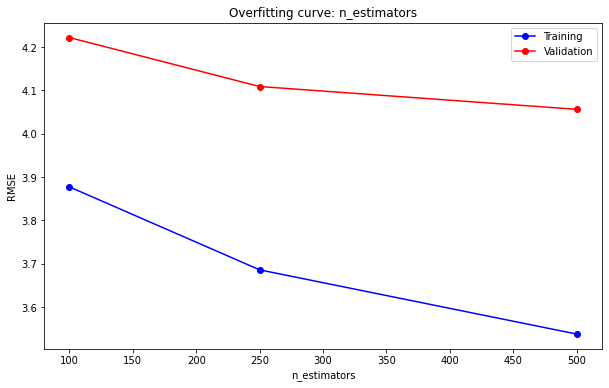

In [113]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

In [ ]:
best_params['n_estimators'] = 500

### Max Depth

CPU times: user 5min 47s, sys: 497 ms, total: 5min 47s
Wall time: 3min 13s


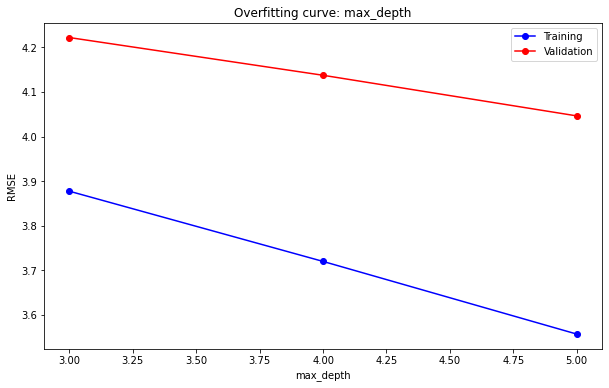

In [114]:
%%time 
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

Looks like a max depth of 5 is ideal.

In [114]:
best_params['max_depth'] = 5

### Learning Rate

CPU times: user 4min 24s, sys: 861 ms, total: 4min 25s
Wall time: 2min 26s


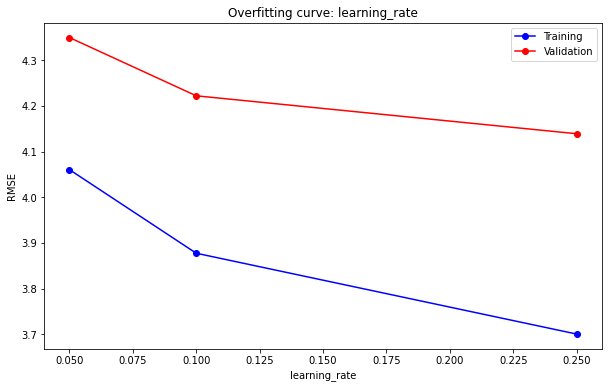

In [115]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

Seems like the best learning rate is 0.25.

In [116]:
best_params['learning_rate'] = 0.25

### Other Parameters

Similarly we can experiment with other parameters. 

Here's a set of parameters that works well:

In [117]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [118]:
%%time
xgb_model_final.fit(train_inputs, train_targets)

CPU times: user 9min 38s, sys: 833 ms, total: 9min 39s
Wall time: 5min 28s


XGBRegressor(colsample_bytree=0.8, max_depth=5, n_estimators=500, n_jobs=-1,
             objective='reg:squarederror', random_state=42, subsample=0.8)

In [119]:
evaluate(xgb_model_final)

(3.118825,
 3.954396,
 array([ 6.4276614,  7.209228 ,  9.865984 , ..., 11.560493 ,  8.992187 ,
        10.366259 ], dtype=float32),
 array([13.86465  ,  6.1836457, 48.45816  , ...,  7.662596 , 29.803427 ,
         8.79762  ], dtype=float32))

In [120]:
predict_and_submit(xgb_model_final, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.884842
1,2015-01-27 13:08:24.0000003,11.047496
2,2011-10-08 11:53:44.0000002,4.927392
3,2012-12-01 21:12:12.0000002,8.795518
4,2012-12-01 21:12:12.0000003,15.437280
...,...,...
9909,2015-05-10 12:37:51.0000002,8.884449
9910,2015-01-12 17:05:51.0000001,12.065751
9911,2015-04-19 20:44:15.0000001,52.724403
9912,2015-01-31 01:05:19.0000005,19.489918


# Insights and Results
* Most taxi rides have 1 passenger.
* Average fare saw a large increase between 2011 and 2013, going from \$10.43 to \\$12.58.
* Fares are highest around 5am, primarily due to long trips leaving the city.
* People take long trips later in the day on weekends.
* Airports and the city centre are taxi hotspots.
* There is an area to the west of the city centre with very high fares per km travelled.
* There is a location about 90km from the city centre from which long trips come and go with substantially lower fares than we would expect.
* The grid most streets are laid along can be seen when examining fare vs point to point distance based on the direction of the trip.

# Results
## Modelling

A gradient boosting decision tree model with RMSE obtained 3.23. Which is an top 30% in the leaderboard.

## References

* Dataset: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview
* Missing semester (Shell scripting): https://missing.csail.mit.edu/
* Opendatsets library: https://github.com/JovianML/opendatasets 
* EDA project from scratch: https://www.youtube.com/watch?v=kLDTbavcmd0
* GeoPy: https://geopy.readthedocs.io/en/stable/#module-geopy.distance 
* Blog post by Allen Kong: https://towardsdatascience.com/nyc-taxi-fare-prediction-605159aa9c24 
* Machine Learning with Python: Zero to GBMs - https://zerotogbms.com 
* Experiment tracking spreadsheet: https://bit.ly/mltrackingsheet 
* Pandas datetime components: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components 
* Haversine distance: https://en.wikipedia.org/wiki/Haversine_formula 
* Haversine distance with Numpy: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas 
* RAPIDS (parent project for cudf and cuml): https://rapids.ai/
* Jovian: https://jovian.ai/aakashns/nyc-taxi-fare-prediction-filled